In [1]:
# I exported the Auto dataset from R Using write.csv(Auto, 'C:/Users/mcichra/Documents/ISLR work/Auto.csv', row.names=FALSE)
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
converters = {'a': int, 'b': int, 'c': int}
Auto = pd.read_csv('C:/Users/mcichra/Documents/ISLR work/Auto.csv', converters=converters)
Auto.shape

(392, 9)

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrices, dmatrix

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
mpg01 = np.repeat(0,392)
mpg01[Auto.mpg>np.median(Auto.mpg)]=1
Auto['mpg01']=mpg01
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

In [4]:
Auto01=Auto
Auto01.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392,392.00
unique,nan,nan,nan,nan,nan,nan,nan,nan,301,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,amc matador,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,5,nan
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58,NaN,0.50
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81,NaN,0.50
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00,NaN,0.00
25%,17.00,4.00,105.00,75.00,"2,225.25",13.78,73.00,1.00,NaN,0.00
50%,22.75,4.00,151.00,93.50,"2,803.50",15.50,76.00,1.00,NaN,0.50
75%,29.00,8.00,275.75,126.00,"3,614.75",17.02,79.00,2.00,NaN,1.00


C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


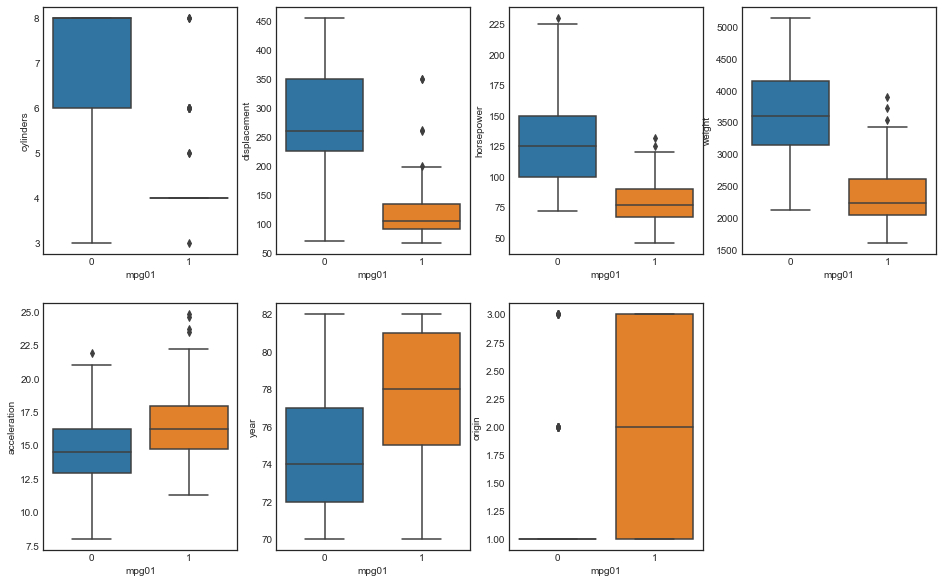

In [5]:
fig = plt.figure(figsize=(16,10)) #width and height
ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0))
ax6 = plt.subplot2grid((2, 4), (1, 1))
ax7 = plt.subplot2grid((2, 4), (1, 2))
sns.boxplot(x="mpg01", y="cylinders", data=Auto01, ax=ax1)
sns.boxplot(x="mpg01", y="displacement", data=Auto01, ax=ax2)
sns.boxplot(x="mpg01", y="horsepower", data=Auto01, ax=ax3)
sns.boxplot(x="mpg01", y="weight", data=Auto01, ax=ax4)
sns.boxplot(x="mpg01", y="acceleration", data=Auto01, ax=ax5)
sns.boxplot(x="mpg01", y="year", data=Auto01, ax=ax6)
sns.boxplot(x="mpg01", y="origin", data=Auto01, ax=ax7)

In [6]:
Auto01.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57,0.84
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57,-0.76
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61,-0.75
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46,-0.67
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59,-0.76
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21,0.35
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18,0.43
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00,0.51
mpg01,0.84,-0.76,-0.75,-0.67,-0.76,0.35,0.43,0.51,1.00


Cylinders, displacement, horsepower, and weight look like they might be most effective in predicting mpg01. The boxplots show that the values of these variables for mpg01 = 1 vs mpg 01 = 0 differ substantially not only in mean but in interquartile range. The correlation matrix hows that the strongest linear relationships exist between mpg01 and these variables. However these variables also appear highly correlated with each other so might not all be significant.

In [21]:
np.random.seed(1)
split = np.random.uniform(0,1,392)
Auto01Test=Auto01[split>=0.7]
Auto01Train=Auto01[split<0.7]
Auto01Train.shape

(272, 10)

In [22]:
X_train= dmatrix("cylinders + displacement + horsepower + weight", Auto01Train)
X_test= dmatrix("cylinders + displacement + horsepower + weight", Auto01Test)
y=Auto01Train.mpg01.as_matrix()
lda = LinearDiscriminantAnalysis(solver='svd')
est = lda.fit(X_train, y)
ldaprobs = est.predict(X_test)
ldapred = np.repeat(0, Auto01Test.shape[0])
ldapred[ldaprobs>.5]=1
df = pd.DataFrame({'Actual MPG Index': Auto01Test.mpg01, 'Predicted MPG Index': ldapred})
df.groupby(['Predicted MPG Index', 'Actual MPG Index']).size().unstack('Actual MPG Index')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Actual MPG Index,0,1
Predicted MPG Index,,
0,54,2
1,12,52


In [23]:
np.mean(ldapred!=Auto01Test.mpg01)

0.11666666666666667

The test error rate is 11.7%. The warning that my variables are collinear suggests that I should remove some cominbination of the predictor variables which are correlated (as I mentioned above). In an actual analyais I would do this. For the purposes of this exercise, the instructions seem to be to use all variables which have a strong relationship to the response variable, so I will continue to use all the variables.

In [24]:
X_train2= dmatrix("cylinders + displacement + horsepower + weight", Auto01Train)
X_test2= dmatrix("cylinders + displacement + horsepower + weight", Auto01Test)
y2=Auto01Train.mpg01.as_matrix()
qda = QuadraticDiscriminantAnalysis()
est2 = qda.fit(X_train2, y2)
qdaprobs = est2.predict(X_test2)
qdapred = np.repeat(0, Auto01Test.shape[0])
qdapred[qdaprobs>.5]=1
df2 = pd.DataFrame({'Actual MPG Index': Auto01Test.mpg01, 'Predicted MPG Index': qdapred})
df2.groupby(['Predicted MPG Index', 'Actual MPG Index']).size().unstack('Actual MPG Index')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Actual MPG Index,0,1
Predicted MPG Index,,
0,66,54


In [25]:
np.mean(qdapred!=Auto01Test.mpg01)

0.45000000000000001

The test error rate is 45% (this is much higher than the result produced in R, perhaps due to solving methodology or due to the randomness of the training/test split)

In [26]:
#GLM using statsmodels formulas (which uses Patsy)
est3 = smf.logit(formula='mpg01 ~ cylinders + displacement + horsepower + weight', data=Auto01Train).fit()
glmprobs = est3.predict(Auto01Test)
glmpred = np.repeat(0,Auto01Test.shape[0])
glmpred[glmprobs>.5]=1
df3 = pd.DataFrame({'Actual MPG Index': Auto01Test.mpg01, 'Predicted MPG Index': glmpred})
df3.groupby(['Predicted MPG Index', 'Actual MPG Index']).size().unstack('Actual MPG Index')

Optimization terminated successfully.
         Current function value: 0.239722
         Iterations 9


Actual MPG Index,0,1
Predicted MPG Index,,
0,54,4
1,12,50


In [27]:
np.mean(glmpred!=Auto01Test.mpg01)

0.13333333333333333

The test error rate for GLM is 13.3%.